# This notebook is intended for plotting 
1. magnetic moments (single impurity calculations, total magnetic moments from the combine impurity calculation)
2. Jij interaction, DMI intetaction and their ratio.

In [22]:
#load aiida environment and connect to database
from aiida import load_profile

profile = load_profile()
print('profile name : ',profile.name)
print('profile database host name : ',profile.database_hostname)
print('default user : ',profile.default_user)
import seaborn as sns

profile name :  default
profile database host name :  localhost
default user :  aiida@localhost


In [23]:
# load classes and functions
from aiida.orm import CifData, Code, Dict, load_node, StructureData 
from aiida.orm import (Group, load_group, load_node, 
                      load_code, groups, WorkChainNode)

from aiida.engine import submit, exceptions
from aiida.common.exceptions import NotExistent
from aiida_kkr.workflows import kkr_imp_sub_wc, kkr_flex_wc, kkr_imp_dos, kkr_imp_wc, kkr_startpot_wc, combine_imps_wc
import numpy as np

from aiida_kkr.calculations import KkrimpCalculation, VoronoiCalculation
import matplotlib.pyplot as plt
from aiida_kkr.tools.common_workfunctions import get_username
import matplotlib.gridspec as gridspec
from aiida_kkr.tools import plot_kkr

#Notes created in this project 
(all the PKs here corresponds to the group come from the old database)
## Single impurity Calculations
- **uuid:** '0aa45296-45d4-418b-a596-680f88c3193b',  **pk:**  74 **label**'3d_4d_dopants_Bi2Te3_ilayer_3'
- **uuid:** '1bed20ba-de50-469c-8bc8-44e4c648daca',  **pk:**  91 **label**'3d_4d_dopants_Bi2Te3_ilayer4'
## Double impurity calculations using single impurity calculations

- **uuid:** '762e0df8-6313-460f-b97b-77b68363b878',  **pk:** 102 **label**'3d_4d_dope_Bi2Te3_il_3:il_3_offset_1'
- **uuid:** 'f8dd374e-4c17-4e46-afd9-171c7f3d1205',  **pk:** 104 **label**'3d_4d_dope_Bi2Te3_il_3:il_4_offset_1'
- **uuid:** '9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1',  **pk:** 115 **label**'3d_4d_dope_Bi2Te3_il_3:il_3_offset_2'
- **uuid:** 'be8b271f-560b-44e0-ae45-6ca29c94382d',  **pk:** 118 **label**'3d_4d_dope_Bi2Te3_il_3:il_4_offset_2'
- **uuid:** '6b21bb7c-f43d-450f-9aca-56970e1b776c',  **pk:** 145 **label**'3d_4d_dope_Bi2Te3_il_3:il_4_offset_5'
- **uuid;** '2b327305-8c53-4637-b2f9-40cc1bdd03d2'   **pk:** 146 **label**'3d_4d_dope_Bi2Te3_il_3:il_4_offset_3'
- **uuid:** 'b1c6d0e9-4a2a-4f2f-808b-dd52bd878699',  **pk:** 147 **label**'3d_4d_dope_Bi2Te3_il_3:il_4_offset_4'
- **uuid:** '96f2ec34-e512-4d47-ac34-d49c36f0c796',  **pk:** 148 **label**'3d_4d_dope_Bi2Te3_il_3:il_3_offset_3'
- **uuid:** '982667b6-11ce-4c8c-9e9b-94440356b62f',  **pk:** 149 **label**'3d_4d_dope_Bi2Te3_il_3:il_3_offset_4'
- **uuid:** '79b27008-b219-4445-8f16-fcae171c88ce',  **pk:** 150 **label**'3d_4d_dope_Bi2Te3_il_3:il_3_offset_5'

## DOS Calculations:
- **uuid:** '5c4c6308-d019-487a-8bba-65ffd9596565',  **pk:** 93  **label**'3d_4d_dopants_Bi2Te3_ilayer4_dos'
- **uuid:** 'ebe1fd31-89f7-4ca1-bf7f-0856940a7ad5',  **pk:** 94  **label**'3d_4d_dopants_Bi2Te3_ilayer_3_dos'

## DOS Calculation Zoom:
- **uuid:** '84649009-607a-45c1-a56d-3d7f2593f434'   **pk:** 107  **label**'3d_4d_dopants_Bi2Te3_ilayer_3_dos_zoom'
- **uuid:** 'b79c67ed-3a2e-4cf9-878f-f6f16cf5d610'   **pk:** 108  **label**'3d_4d_dopants_Bi2Te3_ilayer_4_dos_zoom'

## Similar info as above:
- **uuid:** 0aa45296-45d4-418b-a596-680f88c3193b,    **pk:** 74, **grp_label:** 3d_4d_dopants_Bi2Te3_ilayer_3
- **uuid:** 1bed20ba-de50-469c-8bc8-44e4c648daca,    **pk:** 91, **grp_label:** 3d_4d_dopants_Bi2Te3_ilayer4
- **uuid:** 762e0df8-6313-460f-b97b-77b68363b878,    **pk:** 102,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_3_offset_1
- **uuid:** f8dd374e-4c17-4e46-afd9-171c7f3d1205,    **pk:** 104,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_4_offset_1
- **uuid:** 9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1,    **pk:** 115,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_3_offset_2
- **uuid:** be8b271f-560b-44e0-ae45-6ca29c94382d,    **pk:** 118,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_4_offset_2
- **uuid:** 6b21bb7c-f43d-450f-9aca-56970e1b776c,    **pk:** 145,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_4_offset_5
- **uuid:** 2b327305-8c53-4637-b2f9-40cc1bdd03d2,    **pk:** 146,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_4_offset_3
- **uuid:** b1c6d0e9-4a2a-4f2f-808b-dd52bd878699,    **pk:** 147,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_4_offset_4
- **uuid:** 96f2ec34-e512-4d47-ac34-d49c36f0c796,    **pk:** 148,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_3_offset_3
- **uuid:** 982667b6-11ce-4c8c-9e9b-94440356b62f,    **pk:** 149,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_3_offset_4
- **uuid:** 79b27008-b219-4445-8f16-fcae171c88ce,    **pk:** 150,**grp_label:** 3d_4d_dope_Bi2Te3_il_3:il_3_offset_5
- **uuid:** 5c4c6308-d019-487a-8bba-65ffd9596565,    **pk:** 93, **grp_label:** 3d_4d_dopants_Bi2Te3_ilayer4_dos
- **uuid:** ebe1fd31-89f7-4ca1-bf7f-0856940a7ad5,    **pk:** 94, **grp_label:** 3d_4d_dopants_Bi2Te3_ilayer_3_dos
- **uuid:** 84649009-607a-45c1-a56d-3d7f2593f434,    **pk:** 107,**grp_label:** 3d_4d_dopants_Bi2Te3_ilayer_3_dos_zoom
- **uuid:** b79c67ed-3a2e-4cf9-878f-f6f16cf5d610,    **pk:** 108,**grp_label:** 3d_4d_dopants_Bi2Te3_ilayer4_dos_zoom
- **uuid:** 86ead77b-d34c-41a2-a459-a74854fbb99b,    **pk:** 155,**grp_label:** SomeOtherImportantNodes
- **uuid:** 5f660056-4b5e-483b-b753-773807baeeb2,    **pk:** 154,**grp_label:** CPA_Calculation_Jij_interactions

In [24]:
# To check the group
grps = ['0aa45296-45d4-418b-a596-680f88c3193b', '1bed20ba-de50-469c-8bc8-44e4c648daca', '762e0df8-6313-460f-b97b-77b68363b878',
        'f8dd374e-4c17-4e46-afd9-171c7f3d1205', '9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1', 'be8b271f-560b-44e0-ae45-6ca29c94382d',
        '6b21bb7c-f43d-450f-9aca-56970e1b776c', '2b327305-8c53-4637-b2f9-40cc1bdd03d2', 'b1c6d0e9-4a2a-4f2f-808b-dd52bd878699',
        '96f2ec34-e512-4d47-ac34-d49c36f0c796', '982667b6-11ce-4c8c-9e9b-94440356b62f', '79b27008-b219-4445-8f16-fcae171c88ce',
        '5c4c6308-d019-487a-8bba-65ffd9596565', 'ebe1fd31-89f7-4ca1-bf7f-0856940a7ad5', '84649009-607a-45c1-a56d-3d7f2593f434',
        'b79c67ed-3a2e-4cf9-878f-f6f16cf5d610']
for grp in grps:
    grp_ = load_group(grp)
    print(f'group label: {grp_.label} and pk: {grp_.pk} and uuid: {grp_.uuid}\n')

group label: 3d_4d_dopants_Bi2Te3_ilayer_3 and pk: 191 and uuid: 0aa45296-45d4-418b-a596-680f88c3193b

group label: 3d_4d_dopants_Bi2Te3_ilayer4 and pk: 197 and uuid: 1bed20ba-de50-469c-8bc8-44e4c648daca

group label: 3d_4d_dope_Bi2Te3_il_3:il_3_offset_1 and pk: 203 and uuid: 762e0df8-6313-460f-b97b-77b68363b878

group label: 3d_4d_dope_Bi2Te3_il_3:il_4_offset_1 and pk: 222 and uuid: f8dd374e-4c17-4e46-afd9-171c7f3d1205

group label: 3d_4d_dope_Bi2Te3_il_3:il_3_offset_2 and pk: 205 and uuid: 9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1

group label: 3d_4d_dope_Bi2Te3_il_3:il_4_offset_2 and pk: 220 and uuid: be8b271f-560b-44e0-ae45-6ca29c94382d

group label: 3d_4d_dope_Bi2Te3_il_3:il_4_offset_5 and pk: 214 and uuid: 6b21bb7c-f43d-450f-9aca-56970e1b776c

group label: 3d_4d_dope_Bi2Te3_il_3:il_4_offset_3 and pk: 218 and uuid: 2b327305-8c53-4637-b2f9-40cc1bdd03d2

group label: 3d_4d_dope_Bi2Te3_il_3:il_4_offset_4 and pk: 216 and uuid: b1c6d0e9-4a2a-4f2f-808b-dd52bd878699

group label: 3d_4d_dope_B

In [25]:
###0 To extract data from the two combine impurities as well as single imp to plot :
def ExtractLastCalcData(group_pk, kargs, Average= True, Mom1Chan=False):
    
    """
    Extract the magnetic moment for impurity-1 form the single impurity 
    calculation and total magnetic moments for impurity-1 and impurity-2 
    from the combine_imps calculations.
    
    param: group_pk : Only excepts the Identifier or label 
    param: kargs : {'total_orbital_moment':bool,
                    'total_spin_moment':bool,
                    'spin_moment_per_atom':bool,
                    'orbital_moment_per_atom':bool
                    }
    """
    
    import numpy as np
    from aiida.common.constants import elements as elmt
    import math

    sym_to_zimp = {elmt[zimp]['symbol']:zimp for zimp in elmt.keys()}
    
    combine_imps_group = load_group(group_pk)
    combine_nodes_list = list(combine_imps_group.nodes)
    
    def filter_out(node_list):
        com_wc_list = []
        for nod in node_list:
            try: 
                if nod.process_label == 'combine_imps_wc':
                    com_wc_list.append(nod)
            except NotExistent:
                continue
            except AttributeError:
                continue
        return com_wc_list
    combine_nodes_list = filter_out(combine_nodes_list)
    plot_zimp_row_list = []  # list of imp along the y-axis
    plot_zimp_col_list = [0] # list of imp along the x-axis this extra '0' is indented for singel imp

    for node in combine_nodes_list[:]:
        zimp1, zimp2 = sym_to_zimp[node.label.split(':')[0]], sym_to_zimp[node.label.split(':')[1]]
        ## Here only one imp will be consider for once
        if zimp1 not in plot_zimp_row_list:
            plot_zimp_row_list.append(zimp1)
        if zimp2 not in plot_zimp_col_list:
            plot_zimp_col_list.append(zimp2)

    plot_zimp_row_list.sort()
    plot_zimp_col_list.sort()
            
    plot_imp_row_list = [elmt[zimp]['symbol'] for zimp in plot_zimp_row_list]
    plot_imp_col_list = [elmt[zimp]['symbol'] for zimp in plot_zimp_col_list]

#    print('len of plot_imp_row_list', len(plot_imp_row_list))
#    print('len of plot_imp_col_list', len(plot_imp_col_list))
    
    def imps_index(combine_node):
        imps = combine_node.outputs.workflow_info.get_dict()['imp_info_combined']['Zimp']
        clus = np.array(combine_node.outputs.workflow_info.get_dict()['imp_info_combined']['imp_cls'])
        ind = []
        for i, val in enumerate(clus[:,4]):
            if val in imps:
                ind.append(i)
        return ind
         
    def extract_last_calc_data(combine_nodes_list, kargs, Mom1Chan=False):
        node_list = combine_nodes_list
        extr_comb_dict = {}
        extr_single_dict = {}
        already_search_imp_list= []
        # delete this code
        ii=0
        ##delete this code
        for nod in node_list[:]:
            single_imp_wc = nod.inputs.impurity1_output_node.get_incoming(node_class=kkr_imp_wc).first().node
            zimp= single_imp_wc.inputs.impurity_info.get_dict()['Zimp']
            if zimp not in already_search_imp_list:
                already_search_imp_list.append(zimp)

                out_dict = single_imp_wc.outputs.last_calc_output_parameters.get_dict()

                if kargs['total_orbital_moment']:
                    SpMgMomPerAtom = out_dict['magnetism_group']['total_orbital_moment'][2]
                    out_dict = SpMgMomPerAtom

                elif kargs['total_spin_moment']:
                    SpMgMomPerAtom = out_dict['magnetism_group']['total_spin_moment'][2]
                    out_dict = SpMgMomPerAtom

                elif kargs['spin_moment_per_atom']:                    
                    SpMgMomPerAtom = out_dict['magnetism_group']['spin_moment_per_atom']
                    TotSpM = SpMgMomPerAtom[0][2]
                    out_dict = TotSpM

                elif kargs['orbital_moment_per_atom']:                    
                    SpMgMomPerAtom = out_dict['magnetism_group']['orbital_moment_per_atom']
                    TotSpM = SpMgMomPerAtom[0][2]
                    out_dict = TotSpM
            
                single_imp_val = out_dict
           
                imp1_symbol= elmt[zimp]['symbol']
                extr_single_dict[imp1_symbol]= single_imp_val

            key= nod.label.split(':')[0] + nod.label.split(':')[1]
            
            out_dict = nod.outputs.last_calc_output_parameters.get_dict()


            if kargs['total_orbital_moment']:                
                SpMgMomPerAtom = out_dict['magnetism_group']['total_orbital_moment'][2]
                out_dict = SpMgMomPerAtom
                    
            elif kargs['total_spin_moment']:                
                SpMgMomPerAtom = out_dict['magnetism_group']['total_spin_moment'][2]
                out_dict = SpMgMomPerAtom
            
            elif kargs['spin_moment_per_atom']:
                SpMgMomPerAtom = out_dict['magnetism_group']['spin_moment_per_atom']
                   
                if Mom1Chan:
                    TotSpM = np.sum(np.array(SpMgMomPerAtom)[0,2])
                else:
                    imps_ind = imps_index(combine_node=nod)            
                    TotSpM = np.sum(np.array(SpMgMomPerAtom)[imps_ind,2])
                out_dict = TotSpM
                
            elif kargs['orbital_moment_per_atom']:
                imps_ind = imps_index(combine_node=nod)
                SpMgMomPerAtom = out_dict['magnetism_group']['orbital_moment_per_atom']
                TotSpM = np.sum(np.array(SpMgMomPerAtom)[imps_ind,2])
                out_dict = TotSpM
                
            val = out_dict

            extr_comb_dict[key]= val

        return extr_comb_dict, extr_single_dict

    impcalc_data_array = np.zeros(shape= (len(plot_imp_row_list), len(plot_imp_col_list)), dtype= float)
    extr_comb_dict, extr_single_dict = extract_last_calc_data(combine_nodes_list, kargs,Mom1Chan=Mom1Chan)
    row_index= 0
    col_index= 1 # Here the index '0' is skiped as it is fillled with empty string 'xx'
                 # and the coresponding column will be filles with the data extracted
                 # from the singel imp calc data

    for imp1 in plot_imp_row_list[:]:
        col_index = 1
        for imp2 in plot_imp_col_list[1:]:

            if col_index==1:
                ## Here the first column will be fullfiled with the single im_data
                impcalc_data_array[row_index, col_index-1] = extr_single_dict[imp1]
            search_key = plot_imp_row_list[row_index]  + plot_imp_col_list[col_index]
            if search_key in  extr_comb_dict.keys():
                impcalc_data_array[row_index, col_index] =  extr_comb_dict[search_key]
            else:
                impcalc_data_array[row_index, col_index] =  np.nan 

            col_index += 1
        row_index += 1

    plot_data_shape = np.shape(impcalc_data_array)
    if Average:
        CutCol= plot_imp_col_list[1:]
        CutArr= impcalc_data_array[:, 1:]
        for imp1 in plot_imp_row_list:
            y_index= plot_imp_row_list.index(imp1)
            
            for imp2 in CutCol:
                x_index= CutCol.index(imp2)
                if math.isnan(CutArr[x_index,y_index]):
                    exch_row_col_val= CutArr[y_index,x_index]
                    CutArr[x_index, y_index]= exch_row_col_val
                
        CutArrTrans= CutArr.T
        CutArr+= CutArrTrans
        impcalc_data_array[:,1:]= CutArr/2
        impcalc_data_array = impcalc_data_array
    
#    print(plot_imp_col_list)
#    print(plot_imp_row_list)

    return impcalc_data_array, plot_imp_col_list, plot_imp_row_list

## To extract the data from jij calcculation
def ExtractJijData(group_pk, jij_data_position:int=None, D_dev_J=None, atoms_info: bool= True, Average= True):
    from aiida_kkr.calculations import KkrCalculation
    import math

    """
    param: group_pk : Only excepts the ID
    
    jij_data_position: (0: dr_1, 1:dr_2, 2:dr_3)distance between atoms, 3:J, 4:D(abs value),
                        5:Dx, 6:Dy, 7:Dz  
    D_dev_J: True, to calculate the D J ratio
    atoms_info: To get the atom indices
    Average: To average the ndarray specialy for 
    param: kargs : key_1, key2, to search for data from  the last_calc_output_param 
    """
    import numpy as np
    from aiida.common.constants import elements as elmt
    sym_to_zimp = {elmt[zimp]['symbol']:zimp for zimp in elmt.keys()}
    
    combine_imps_group = load_group(group_pk)
    combine_nodes_list = list(combine_imps_group.nodes)
    
    def filter_out(node_list):
        com_wc_list = []
        for nod in node_list:
            try: 
                if nod.process_label == 'combine_imps_wc':
                    com_wc_list.append(nod)
            except NotExistent:
                continue
            except AttributeError:
                continue
        return com_wc_list
    
    combine_nodes_list = filter_out(combine_nodes_list)
    
    plot_zimp_row_list = []  # This is the list considered as zimp along the y-axis
    plot_zimp_col_list = []  # This is the list considered as zimp along the x-axis

    for node in combine_nodes_list[:]:        
        zimp1, zimp2 = sym_to_zimp[node.label.split(':')[0]], sym_to_zimp[node.label.split(':')[1]]

        if zimp1 not in plot_zimp_row_list:
            plot_zimp_row_list.append(zimp1)
        if zimp2 not in plot_zimp_col_list:
            plot_zimp_col_list.append(zimp2)
    
    plot_zimp_row_list.sort()
    plot_zimp_col_list.sort()

    # This is the list considered as the label for yticks
    plot_imp_row_list = [elmt[zimp]['symbol'] for zimp in plot_zimp_row_list]
    # This is the list considered as the label for yticks
    plot_imp_col_list = [elmt[zimp]['symbol'] for zimp in plot_zimp_col_list]

#    print('len of plot_imp_row_list', len(plot_imp_row_list))
#    print('len of plot_imp_col_list', len(plot_imp_col_list))

    # Extract the JijData and JijInfo from the list of combined_imps_node_list
    def extract_jij(combine_nodes_list, jij_data_position:int=None, D_dev_J=None, atoms_info: bool= True):
        node_list = combine_nodes_list
        extr_comb_dict = {}

        Jij_data = None
        some_info_dict = {}
        for nod in node_list[:]:
            key= nod.label.split(':')[0] + nod.label.split(':')[1]
        
            if jij_data_position in [3,4]:
                Jij_data = nod.outputs.JijData.get_array('JijData')[0,:]
                Jij_info = nod.outputs.JijInfo.get_dict()['text'].split('\n')[3].split()
                extr_comb_dict[key]= Jij_data[jij_data_position]
            elif  D_dev_J==True:
                Jij_data = nod.outputs.JijData.get_array('JijData')[0,:]
                Jij_info = nod.outputs.JijInfo.get_dict()['text'].split('\n')[3].split()
                d_j = Jij_data[4]/Jij_data[3]
                extr_comb_dict[key] = d_j
            else:
                print('provide valid input in the funcion ExtractJijData.')
        try:
            kkr_calc= combine_nodes_list[0].outputs.remote_data_gf.get_incoming(node_class=KkrCalculation).all()[0].node
        except:
            kkr_calc= combine_nodes_list[0].inputs.gf_host_remote.get_incoming(node_class=KkrCalculation).all()[0].node
        kkr_output_dict= kkr_calc.outputs.output_parameters.get_dict()



        if atoms_info:
            dist = np.sqrt(np.sum([i**2 for i in Jij_data[0:3]]))
            imps_index = (int(Jij_info[0]), int(Jij_info[1]))
            some_info_dict = {'some_info':{ 'imp_indices' : imps_index ,
                                            'atom_distance' : dist,
                                            'alat' :kkr_output_dict['alat_internal'],
                                            'alat_unit': 'Bohr'
                                            }
                             }

        return extr_comb_dict, some_info_dict #, extr_single_dict

    # To fill the 2d plot data here
    jij_data_array = np.zeros(shape= (len(plot_imp_row_list), len(plot_imp_col_list)), dtype= float)
    extr_comb_dict, some_info_dict = extract_jij(combine_nodes_list, jij_data_position=jij_data_position, D_dev_J=D_dev_J, atoms_info=atoms_info)
    row_index= 0
    col_index= 0 # Here the index '0' is skiped as it is fillled with empty string 'xx'
                 # and the coresponding column will be filles with the data extracted
                 # from the singel imp calc data

    for imp1 in plot_imp_row_list[:]:
        col_index = 0
        for imp2 in plot_imp_col_list[:]:

            search_key = plot_imp_row_list[row_index]  + plot_imp_col_list[col_index]
            if search_key in  extr_comb_dict.keys():
                jij_data_array[row_index, col_index] =  extr_comb_dict[search_key]
            else:
                jij_data_array[row_index, col_index] =  np.nan 

            col_index += 1
        row_index += 1
## Average the map 
    if Average:
        
        for imp1 in plot_imp_row_list:
            y_index= plot_imp_row_list.index(imp1)
            for imp2 in plot_imp_col_list:
                x_index= plot_imp_col_list.index(imp2)
                if math.isnan(jij_data_array[x_index,y_index]):
                    exch_row_col_val= jij_data_array[y_index,x_index]
                    jij_data_array[x_index, y_index]= exch_row_col_val
        
        JijDataTr= jij_data_array.T
        jij_data_array += JijDataTr
        jij_data_array = jij_data_array/2

    plot_data_shape = np.shape(jij_data_array)
    
    ## This part is for correcting the
    if jij_data_position==3:
        dict_for_last_calc_data= {  
                            'total_orbital_moment':False,
                            'total_spin_moment':False,
                            'spin_moment_per_atom':True,
                            'orbital_moment_per_atom':False
                     }
        spin_data_array, _, _ = ExtractLastCalcData(group_pk, dict_for_last_calc_data, Average=False)
        mom_array_shape= np.shape(spin_data_array[:,1:])

        for row_index in range(mom_array_shape[0]):
            for col_index in range(mom_array_shape[1])[row_index:]:

                sign= 1
                ij_spin_value= spin_data_array[row_index, col_index+1] 
                ji_spin_value= spin_data_array[col_index, row_index+1]
                if not ((ij_spin_value >= 0 and ji_spin_value >= 0) or (ij_spin_value < 0 and ji_spin_value < 0)):
                        sign *= -1
                jij_data_array[row_index, col_index] = (jij_data_array[row_index, col_index])*sign
                jij_data_array[col_index, row_index] = (jij_data_array[col_index, row_index])*sign
                      
        
    return jij_data_array, plot_imp_col_list, plot_imp_row_list, some_info_dict


In [26]:
def extract_ploting_array_data(group,
                               dict_for_last_calc_data=None,
                               spin_data= True,
                               Jij_data= True,
                               DM_data_array= True,
                               DRatioJ_data_array= True,
                               Average= False,
                               plot_with_difference= False,
                               filter_DMI = True,# Filter the array with respect to Jij array
                               filter_DMI_by_Jij= True, # Filter the array with respect to Jij array
                               filter_by_min_Jij_value= 1,
                              ):
    ploting_data= dict()
    if dict_for_last_calc_data==None:
        dict_for_last_calc_data= {  'total_orbital_moment':False,
                            'total_spin_moment':False,
                            'spin_moment_per_atom':True,
                            'orbital_moment_per_atom':False
                         }
    if spin_data:
        
        if plot_with_difference:
            (spin_data_array, spin_xtick_labels, spin_ytick_labels) = ExtractLastCalcData(group,dict_for_last_calc_data,
                                                                                      Average= Average, Mom1Chan=True )
            data_shape= np.shape(spin_data_array)
            for row_num in range(data_shape[0]):
                spin_data_array[row_num,:] = spin_data_array[row_num,:] - spin_data_array[row_num,0]
        else: 
            (spin_data_array, spin_xtick_labels, spin_ytick_labels) = ExtractLastCalcData(group,dict_for_last_calc_data,
                                                                                      Average= Average, Mom1Chan=False )
        ploting_data['spin_data_array']= (spin_data_array, spin_xtick_labels, spin_ytick_labels)
        
    if Jij_data:
        (Jij_data_array, Jij_xtick_labels, Jij_ytick_labels, some_info_dict)  = ExtractJijData(group, 
                                                                                         jij_data_position=3)
        ploting_data['Jij_data_array']= (Jij_data_array, Jij_xtick_labels, Jij_ytick_labels, some_info_dict)
        
    if DM_data_array:
        (DM_data_array, DM_xtick_labels, DM_ytick_labels, some_info_dict) = ExtractJijData(group, 
                                                                                     jij_data_position=4)
        DM_data_array = np.around(DM_data_array, decimals=2)
    
    if DRatioJ_data_array:
        
        (DRatioJ_data_array, DRatioJ_xtick_labels, DRatioJ_ytick_labels, some_info_dict) = ExtractJijData(group, 
                                                                                                    D_dev_J=True)
        DRatioJ_data_array = np.around(DRatioJ_data_array, decimals=2) 
        DRatioJ_data_array = np.absolute(DRatioJ_data_array)

    if filter_DMI or filter_DMI_by_Jij:
        Jij_shape = np.shape(Jij_data_array)
        
        # x_mesh = y_mesh
        for i in range(Jij_shape[0]):
            for j in range(Jij_shape[1])[i:]:
                if abs(Jij_data_array[i,j]) <= filter_by_min_Jij_value:
                    
                    if filter_DMI:
                        DM_data_array[i,j] = 0
                        DM_data_array[j,i] = 0
                    
                    if filter_DMI_by_Jij:
                        DRatioJ_data_array[i,j] = 0
                        DRatioJ_data_array[j,i] = 0
                        
    
    ploting_data['DM_data_array'] = (DM_data_array, DM_xtick_labels, DM_ytick_labels, some_info_dict)
    ploting_data['DRatioJ_data_array'] = (DRatioJ_data_array, DRatioJ_xtick_labels, DRatioJ_ytick_labels, some_info_dict)
    
    return ploting_data
    

In [27]:

def dimer_plot(group, with_seaborn= False, 
                save_intofile=False,
                file_name= None,
                ploting_data=None,

               ):
    
    """
        dict_for_last_calc_data (dict): To extract the data from the last calc
        plot_with_diFalsence, bool: This will plot value-difference between
                                the First_imp from the single_imp_wc and first_imp from the mutiple_imp_wc.
                                This mainly introduces because how propertise of the first_imp is changed due to
                                the other induced imp. Other the plot will for the exact value found in the calculation  
    """
    import matplotlib.pyplot as plt
    import matplotlib
    import matplotlib as cm
    import math
    import numpy as np
    from matplotlib import ticker
    import seaborn as sns  
    
    font = {'family':'sans-serif',
        'weight': 'normal',
        'size':11.5
       }
    plt.rc('font',**font)
    
    array_data = []    
    
    if 'spin_data_array' in ploting_data.keys():
        spin_data_array, spin_xtick_labels, spin_ytick_labels = ploting_data['spin_data_array']
        array_data.append(spin_data_array)
        
    if 'Jij_data_array' in ploting_data.keys():
        Jij_data_array, Jij_xtick_labels, Jij_ytick_labels, some_info_dict  = ploting_data['Jij_data_array']
        array_data.append(Jij_data_array)
        
    if 'DM_data_array' in ploting_data.keys():
        DM_data_array, DM_xtick_labels, DM_ytick_labels, some_info_dict = ploting_data['DM_data_array']
        array_data.append(DM_data_array)
        
    if 'DRatioJ_data_array' in ploting_data.keys():
        DRatioJ_data_array, DRatioJ_xtick_labels, DRatioJ_ytick_labels, some_info_dict = ploting_data['DRatioJ_data_array']
        array_data.append(DRatioJ_data_array)
    
    xtick_points = [list(range(np.shape(spin_data_array)[1])), list(range(np.shape(Jij_data_array)[1])), list(range(np.shape(DM_data_array)[1])), list(range(np.shape(DRatioJ_data_array)[1]))]

    xtick_labels = [spin_xtick_labels, Jij_xtick_labels, DM_xtick_labels, DRatioJ_xtick_labels]

    ytick_points = [list(range(np.shape(spin_data_array)[0])), list(range(np.shape(Jij_data_array)[0])), list(range(np.shape(DM_data_array)[0])), list(range(np.shape(DRatioJ_data_array)[0]))]
    ytick_labels = [spin_ytick_labels, Jij_ytick_labels, DM_ytick_labels, DRatioJ_ytick_labels]

    array_data = [spin_data_array, Jij_data_array, DM_data_array, DRatioJ_data_array]
    label_x_y = [['impurity-2','impurity-1'], ['impurity-2','impurity-1'], ['impurity-2','impurity-1'],  ['impurity-2','impurity-1']]
    title = [
             'Total mag. mom. (in $\mu_B$) for dimer calculation.', 
             'Inter-impurity Jij interactions (in meV)', 
             'DMI (in meV)', 
             '$\mathrm{D_{ij}\,/\,J_{ij}}$' 
            ]
    
    fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(20,15), )
    
    linspace_bin= 64
    

    top = cm.cm.get_cmap('Oranges', 128) # Some color names: '
    bottom = cm.cm.get_cmap('Blues', 128)
    
    middle = cm.cm.get_cmap('RdBu_r')
    DMI_map= cm.cm.get_cmap('Reds')
    DMI_ratio= cm.cm.get_cmap('Reds')
    #from matplotlib.colors import ListedColormap, LinearSegmentedColormap

    colors_1 = np.vstack((top(np.linspace(0, 1, linspace_bin)),
                       bottom(np.linspace(0, 1, linspace_bin))))
    colors_3 = np.vstack(middle(np.linspace(0,1,linspace_bin*2)))

    colors_2 = ["r", "b", "g"]

    cmap1 = matplotlib.colors.ListedColormap(colors_1) ## use 'colors',
    cmap3 = matplotlib.colors.ListedColormap(colors_3)
    bounds = [-100,-0.01,0.01,100]
    norm1 = matplotlib.colors.BoundaryNorm(bounds, len(colors_1))
    norm0 = None
    bounds = np.linspace(-1.0, 1.0, linspace_bin*2)
    norm2 = cm.colors.BoundaryNorm(boundaries=bounds, ncolors=linspace_bin*2)

    cmap = [cmap3, cmap3, DMI_map, DMI_ratio]
    norm = [norm2, norm2, norm2, norm2]

    
    i = 0
    auto_norm= True
    for ax in axs.ravel():
        

        
        if len(axs.ravel()) > len(array_data):
            continue
        if auto_norm:

            limt_max = array_data[i].max()
            limt_min = array_data[i].min()
            if math.isnan(limt_max):# or math.isnan(limt_min):
                limt_max= limt_min
            else:
                if abs(limt_max)< abs(limt_min):
                    scale_limt = abs(limt_min)
                else:
                    scale_limt = abs(limt_max)
                bounds= np.linspace(-1*abs(scale_limt), abs(scale_limt), linspace_bin*2)
                    
                if  cmap[i] == DMI_ratio:#cmap[i]==DMI_map or
                    if abs(limt_max)< abs(limt_min):
                        scale_limt = abs(limt_min)
                    else:
                        scale_limt = abs(limt_max)
                    bounds= np.linspace(0, abs(scale_limt), linspace_bin*2)

                    aut_norm =cm.cm.colors.SymLogNorm(linthresh= 0.01, vmin=0, vmax=scale_limt)
                    
                    norm[i] = aut_norm
                else:    
                    aut_norm = cm.cm.colors.BoundaryNorm(boundaries=bounds, ncolors=linspace_bin*2)
                    norm[i] = aut_norm
        

        if i==3:
            
            if with_seaborn:
                sns.heatmap(array_data[i], ax=ax, annot=True, norm= norm[i], cmap=cmap[i])

            else:
                img = ax.pcolormesh(array_data[i], cmap=cmap[i], norm=norm[i], rasterized=True, vmin=-5, vmax=5)
        else:

            if with_seaborn:
                sns.heatmap(np.around(array_data[i], decimals=2), ax=ax, annot=True,  cmap=cmap[i], norm= norm[i])

            else:
                img = ax.pcolormesh(array_data[i], cmap=cmap[i], norm=norm[i], rasterized=True)
        
        
        xtick_locator = np.add(xtick_points[i], 0.5).tolist()
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.xaxis.set_minor_locator(ticker.FixedLocator(xtick_locator))
        ax.xaxis.set_minor_formatter(ticker.FixedFormatter(xtick_labels[i]))

        ## centring the yticks with formatter and locator
        ytick_locator = np.add(ytick_points[i], 0.5).tolist()
    
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_formatter(ticker.NullFormatter())
        ax.yaxis.set_minor_locator(ticker.FixedLocator(ytick_locator))
        ax.yaxis.set_minor_formatter(ticker.FixedFormatter(ytick_labels[i]))

        ax.set_xlabel(label_x_y[i][0], fontsize=15)
        ax.set_ylabel(label_x_y[i][1], fontsize=15)
        ax.set_title(title[i], fontsize=19)
        
        if i==3:
            ax2 = ax
        i += 1
    
    imp_index = some_info_dict['some_info']['imp_indices']
    atom_distance = some_info_dict['some_info']['atom_distance']
    alat = some_info_dict['some_info']['alat']
    alat = 10.472657559692419 # This sould be the alat value
    msg = f'imp_index: {imp_index}, Distance: {atom_distance} alat; 1 alat= {alat} Bohr'


    if save_intofile:
        if file_name:
            pdf_title= file_name
        else:
            pdf_title= group_label +'.png'
        extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        plt.savefig(pdf_title, bbox_inches= extent.expanded(1.4,1.2), dpi=300)
#    plt.savefig(pdf_title, dpi=300)       
    return Jij_data_array, spin_data_array


3d_4d_dope_Bi2Te3_il_3:il_3_offset_1


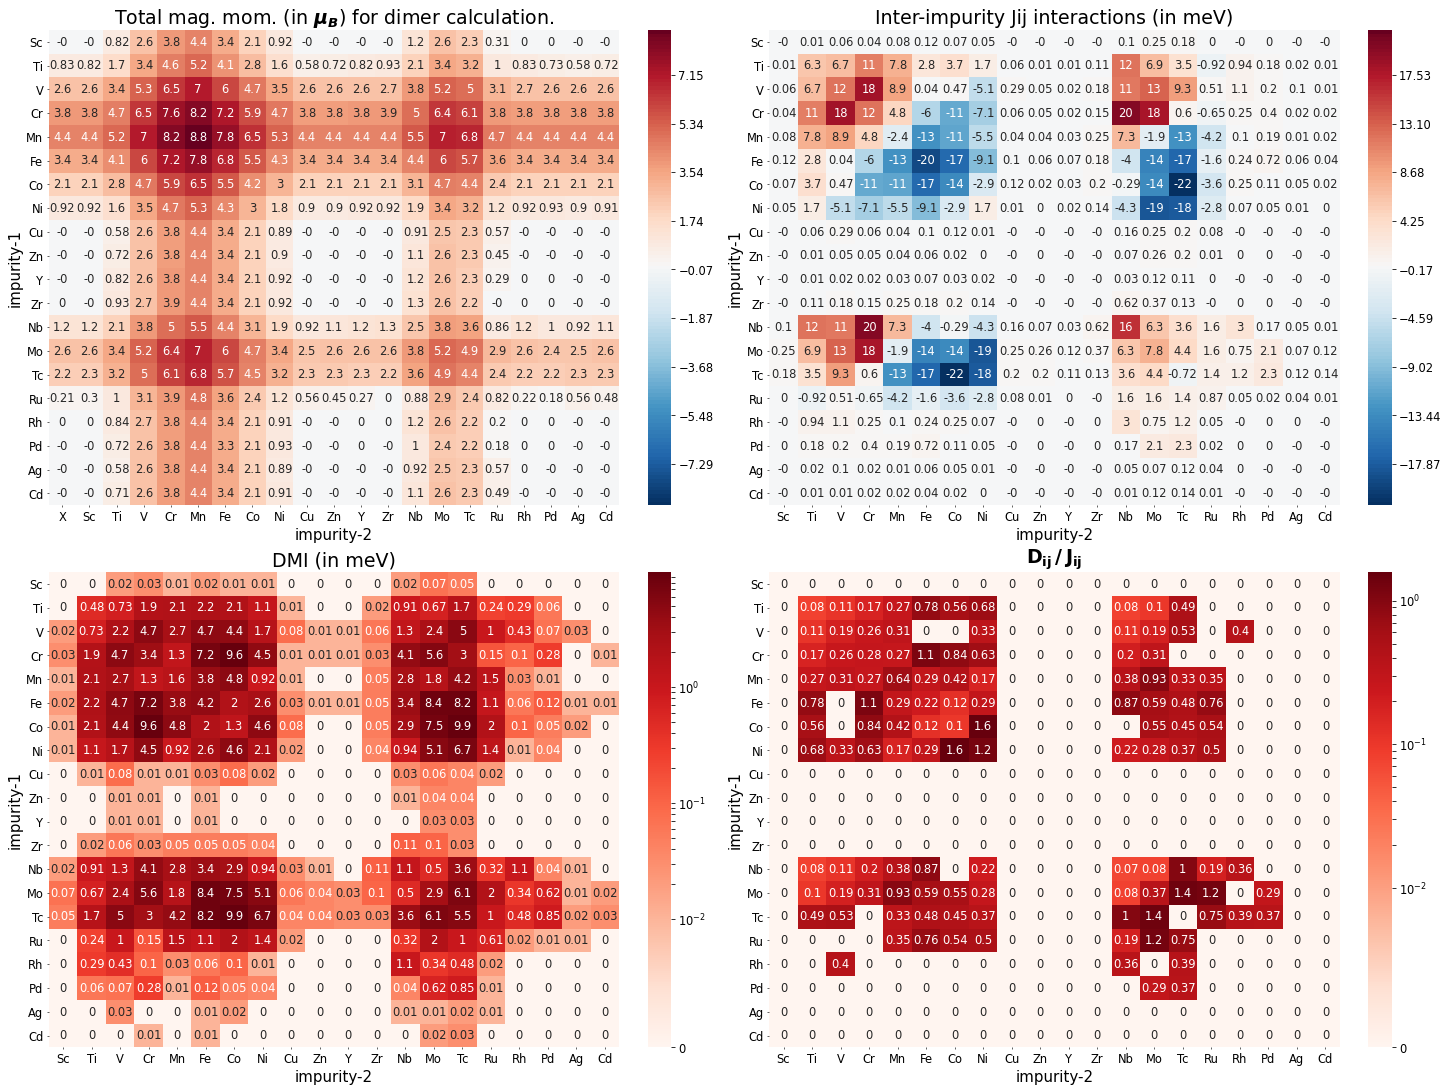

In [28]:


dict_for_last_calc_data= {  'total_orbital_moment':False,
                            'total_spin_moment':False,
                            'spin_moment_per_atom':True,
                            'orbital_moment_per_atom':False
                         }


group_pks= ['762e0df8-6313-460f-b97b-77b68363b878']#, 104, 115, 118 ]
# uuid: '762e0df8-6313-460f-b97b-77b68363b878', pk: 102
# uuid: 'f8dd374e-4c17-4e46-afd9-171c7f3d1205', pk: 104
# uuid: '9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1', pk: 115
# uuid: 'be8b271f-560b-44e0-ae45-6ca29c94382d', pk: 118

# plot_with_difference -> collecct the mag diff in imp1 due to 
#                          insertion of imp2

for group_pk in group_pks:
    print(load_group(group_pk).label)

    ploting_data_without_diff = extract_ploting_array_data(group_pk, Average=False, plot_with_difference=False,
                                                      dict_for_last_calc_data=dict_for_last_calc_data,
                                                          filter_DMI = False)

#'mag_mom1_change_3_3_off_1_' -> for changes of magnetic moment 
#'total_magnetic_moment__'

    #file_name= 'mag_mom1_change_3_3_off_1_' + load_group(group_pk).label + '.pdf'
    file_name = 'total_magnetic_moment__del' + load_group(group_pk).label + '.pdf'
    jij, smm = dimer_plot(group_pk, ploting_data=ploting_data_without_diff, with_seaborn=True,  
                         file_name=file_name, save_intofile= True)


In [ ]:
# The optput dict format for extract_ploting_array_data function

#ploting_data_with_diff = {'spin_data_array': (array(),
#  ['X', 'V', 'Cr', 'Mn', 'Mo', 'Tc'], 
#       ['V', 'Cr', 'Mn', 'Mo', 'Tc']),
# 'Jij_data_array': (array(),
#  ['V', 'Cr', 'Mn', 'Mo', 'Tc'],
#  ['V', 'Cr', 'Mn', 'Mo', 'Tc'],
#  {'some_info': {'imp_indices': (0, 15),
#    'atom_distance': 1.2555446807174,
#    'alat': 8.2826,
#    'alat_unit': 'Bohr'}}),
# 'DM_data_array': (array(),
#  ['V', 'Cr', 'Mn', 'Mo', 'Tc'],
#  ['V', 'Cr', 'Mn', 'Mo', 'Tc'],
#  {'some_info': {'imp_indices': (0, 15),
#    'atom_distance': 1.2555446807174,
#    'alat': 8.2826,
#    'alat_unit': 'Bohr'}}),
# 'DRatioJ_data_array': (array(),
#                        
#  ['V', 'Cr', 'Mn', 'Mo', 'Tc'],
#  ['V', 'Cr', 'Mn', 'Mo', 'Tc'],
#  {'some_info': {'imp_indices': (0, 15),
#    'atom_distance': 1.2555446807174,
#    'alat': 8.2826,
#    'alat_unit': 'Bohr'}})}

In [ ]:
#file_name= 'magnetic_moment_diff__' + load_group(group_pk).label + '.pdf'
#total_magnetic_moment__3d_4d_dope_Bi2Te3_il_3:il_3_offset_1
file_name= 'Jij__' + load_group(group_pk).label + '.png'
jij, smm =dimer_plot(group_pk, ploting_data=ploting_data_without_diff, with_seaborn=True,  file_name=file_name, save_intofile= True)#, DM_data_array=False,DRatioJ_data_array=False,Jij_data=False) # 

In [ ]:
## Some other plots for combined_imps data
## Spin momentum along the z axis taking count only one imp of the two
## TODO: Also add the another data for second same impurity and average them, The calcualation AB and BA
import matplotlib as mpl
group = 104
dict_for_last_calc_data= {  'total_orbital_moment':False,
                            'total_spin_moment':False,
                            'spin_moment_per_atom':True,
                            'orbital_moment_per_atom':False
                         }

mpl.style.use('ggplot')
spin_data_array, spin_xtick_labels, spin_ytick_labels = ExtractLastCalcData(group, kargs=dict_for_last_calc_data,Average= False, Mom1Chan=True)
## here the parameter 'average' should set to be false as here nothing to be average as this anly use for np.array 

# spin_data_array
arr_shape= np.shape(spin_data_array)
max_val= np.max(spin_data_array)
min_val= np.min(spin_data_array)
xtick_loc= range(len(spin_xtick_labels[1:]))
xtick_lab = spin_xtick_labels[1:]


n = arr_shape[0]
color = plt.cm.hot_r(np.linspace(0.1,0.9,n)) # This returns RGBA; convert:
line_design= ['o--', 'o-', '+--', '--', '*--']
    
fig, ax_zs_mom= plt.subplots(1,1, figsize=(15,10))
for i in range(arr_shape[0]):
    
    line= list(spin_data_array[i,1:])
    ax_zs_mom.plot(line, line_design[i%len(line_design)], label=f'{spin_ytick_labels[i]}', color= color[n-1-i])
leg= ax_zs_mom.legend(loc= 'upper right', shadow= True, bbox_to_anchor=[1.3,1],  ncol= 2, title="impurities", fancybox= True )
leg.get_title().set_color('blue')
leg.get_title().set_fontsize(15)
plt.xticks(xtick_loc, xtick_lab)
plt.show()


In [7]:
###### Ploting distance Vs Magnetic moment

#def collect_Jij_data(group_list=[104,102, 118, 115], Average= None):
    
def collect_Jij_data(group_list=['f8dd374e-4c17-4e46-afd9-171c7f3d1205', '762e0df8-6313-460f-b97b-77b68363b878', 
                                 'be8b271f-560b-44e0-ae45-6ca29c94382d', '9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1'],
                        data_label = ['Jij', 'Dij', 'J/D'], Average= False ):
    
    #To colloect the Jij Data
    accending_distance_group = group_list
    dict_for_last_calc_data= {'key1':'magnetism_group',
                              'key2':'spin_moment_per_atom',
                              'key3': 0,
                              'key4': 2
                             }

    group_to_plot_data_and_some_info_dict = dict()
    dis_com_map = dict()
    # Extract the stract the jij_data and atomic distance
    for group_pk in accending_distance_group:
        ploting_data_with_diff = extract_ploting_array_data(group_pk,
                                                         dict_for_last_calc_data=None,
                                                         spin_data= False,
                                                         Jij_data= True,
                                                         DM_data_array= True,
                                                         DRatioJ_data_array= True,
                                                         Average= False,
                                                         plot_with_difference= False,
                                                         filter_DMI = False, # Filter the array with respect to Jij array
                                                         filter_DMI_by_Jij= True, # Filter the array with respect to Jij array
                                                         filter_by_min_Jij_value= 1, # If Jij >= 1 than Dji set to zero
                                                        )


        group_to_plot_data_and_some_info_dict[str(group_pk)] = dict()
        
        if 'Jij' in data_label and 'Jij_data_array' in ploting_data_with_diff.keys():
            Jij_data_array, Jij_xtick_labels, Jij_ytick_labels, some_info_dict  = ploting_data_with_diff['Jij_data_array']

            group_to_plot_data_and_some_info_dict[str(group_pk)]['Jij'] = (Jij_data_array, Jij_xtick_labels, 
                                                                           Jij_ytick_labels, some_info_dict)
        if 'Dij' in data_label and 'DM_data_array' in ploting_data_with_diff.keys():
            Dij_data_array, Dij_xtick_labels, Dij_ytick_labels, some_info_dict  = ploting_data_with_diff['DM_data_array']
            group_to_plot_data_and_some_info_dict[str(group_pk)]['Dij'] = (Dij_data_array, Dij_xtick_labels, 
                                                                           Dij_ytick_labels, some_info_dict)
        if 'J/D' in data_label and 'DRatioJ_data_array' in ploting_data_with_diff.keys():
            DRatioJ_data_array, DRatioJ_xtick_labels, DRatioJ_ytick_labels, some_info_dict  = ploting_data_with_diff['DRatioJ_data_array']
            group_to_plot_data_and_some_info_dict[str(group_pk)]['D/J'] = (DRatioJ_data_array, DRatioJ_xtick_labels, 
                                                                           DRatioJ_ytick_labels, some_info_dict)
        
        
    return group_to_plot_data_and_some_info_dict


# Parse data from the Jij_data_and_some_info_dict to the Json Type file
def parse_to_Json(plot_imp_list, group_to_plot_data_and_some_info_dict,
                  imp1_plot_list= None, average= True):
    
    """Describtion.
    Arguments:
        plot_imp_list: all cmbination of the imps will be ploted
        
        group_to_Jij_daa_and_some_info_dict: gives the dict in format
                                            {group: (Jij_data_array, Jij_xtick_labels, 
                                                    Jij_ytick_labels, some_info_dict) }
        
    """
    
    group_list = list(group_to_plot_data_and_some_info_dict.keys())
    dat_typ_lis = list(group_to_plot_data_and_some_info_dict[group_list[0]].keys())

    plot_data = []
    
    for imp1 in plot_imp_list:

        single_plot_data = {'imp1': imp1,
                     'imp2' : None}
        imp2_dict = dict() 

        for imp2 in plot_imp_list:
            if 'Jij' in dat_typ_lis:
                Jij = []
            if 'Dij' in dat_typ_lis:
                Dij = []
            if 'D/J' in dat_typ_lis:
                DRatioJ = []
            dist = []
            
            for grp in group_list:
                if 'Jij' in dat_typ_lis:
                    Jij_array, x_labels, y_labels, info_dict = group_to_plot_data_and_some_info_dict[grp]['Jij']
                if 'Dij' in dat_typ_lis:
                    Dij_array, x_labels, y_labels, info_dict = group_to_plot_data_and_some_info_dict[grp]['Dij']
                if 'D/J' in dat_typ_lis:
                    DRatioJ_array, x_labels, y_labels, info_dict = group_to_plot_data_and_some_info_dict[grp]['D/J']
                    
                ind1, ind2 = x_labels.index(imp1), y_labels.index(imp2)
                if 'Jij' in dat_typ_lis:
                    Jij.append(Jij_array[ind1, ind2])
                
                if 'Dij' in dat_typ_lis:
                    Dij.append(Dij_array[ind1, ind2])
                
                if 'D/J' in dat_typ_lis:
                    DRatioJ.append(DRatioJ_array[ind1, ind2])
                
                dist.append(info_dict['some_info']['atom_distance'])
                
            imp2_dict[imp2] = {'Jij' : Jij,
                               'Dij' : Dij,
                               'D/J' : DRatioJ,
                               'dist' : dist}
        
        single_plot_data['imp2'] = imp2_dict
        plot_data.append(single_plot_data)
        
    return plot_data

In [17]:
#  #### To collect data from all dimar groups
grps = ['762e0df8-6313-460f-b97b-77b68363b878', 'f8dd374e-4c17-4e46-afd9-171c7f3d1205', 
        '9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1', 'be8b271f-560b-44e0-ae45-6ca29c94382d', 
        '6b21bb7c-f43d-450f-9aca-56970e1b776c', '2b327305-8c53-4637-b2f9-40cc1bdd03d2', 
        'b1c6d0e9-4a2a-4f2f-808b-dd52bd878699', '96f2ec34-e512-4d47-ac34-d49c36f0c796',
        '982667b6-11ce-4c8c-9e9b-94440356b62f', '79b27008-b219-4445-8f16-fcae171c88ce'] 

# Note 140 is not completed
group_to_Jij_data_and_some_info_dict = collect_Jij_data(group_list= grps,)
ll = list(group_to_Jij_data_and_some_info_dict.keys())
type(group_to_Jij_data_and_some_info_dict[ll[0]])

#### To extract data in json formate for ploting jij_vs_dist
lattice_const = 10.4726
plot_data = parse_to_Json(['V', 'Cr', 'Mn', 'Mo', 'Tc', 'Nb'], group_to_Jij_data_and_some_info_dict)

dis_comb_label_map=dict()

for grp_pk in group_to_Jij_data_and_some_info_dict.keys():
   # print(grp_pk)
    dis_comb_label_map[group_to_Jij_data_and_some_info_dict[grp_pk]['Jij'][3]['some_info']['atom_distance']] = load_group(grp_pk).label

print(dis_comb_label_map)

{0.41851489357247: '3d_4d_dope_Bi2Te3_il_3:il_3_offset_1', 0.5822211212787: '3d_4d_dope_Bi2Te3_il_3:il_4_offset_1', 0.83702978714494: '3d_4d_dope_Bi2Te3_il_3:il_3_offset_2', 0.7170328794448708: '3d_4d_dope_Bi2Te3_il_3:il_4_offset_2', 1.1224845733334692: '3d_4d_dope_Bi2Te3_il_3:il_4_offset_5', 0.747898892099499: '3d_4d_dope_Bi2Te3_il_3:il_4_offset_3', 1.019607914166485: '3d_4d_dope_Bi2Te3_il_3:il_4_offset_4', 1.0000000000000007: '3d_4d_dope_Bi2Te3_il_3:il_3_offset_3', 1.1620281546864297: '3d_4d_dope_Bi2Te3_il_3:il_3_offset_4', 1.2555446807174: '3d_4d_dope_Bi2Te3_il_3:il_3_offset_5'}


8.7658781488541

In [18]:
import json

### +++++ To save the data in json file +++++

with open('dis_comb_label_map.Json', 'w') as f:
    json.dump(dis_comb_label_map,f)
    
with open('impurity_jij_dis_plot_data.Json', 'w') as f:
    json.dump(plot_data, f)
  

### To load the data from json file

with open('dis_comb_label_map.Json', 'r') as f:
    dis_comb_label_map = json.load(f)
with open('impurity_jij_dis_plot_data.Json', 'r') as f:
    plot_data = json.load(f)
#len(plot_data[0]['imp2']['V']['jij'])


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as m

font = {'family':'normal',
        'weight': 'bold',
        'size':14}
m.rc('font',**font)
colors = ['b', 'g', 'r', 'c', 'm', 'y']

save_figure as : V_Dij_combine.png
save_figure as : Cr_Dij_combine.png
save_figure as : Mn_Dij_combine.png
save_figure as : Mo_Dij_combine.png


<Figure size 1800x1296 with 0 Axes>

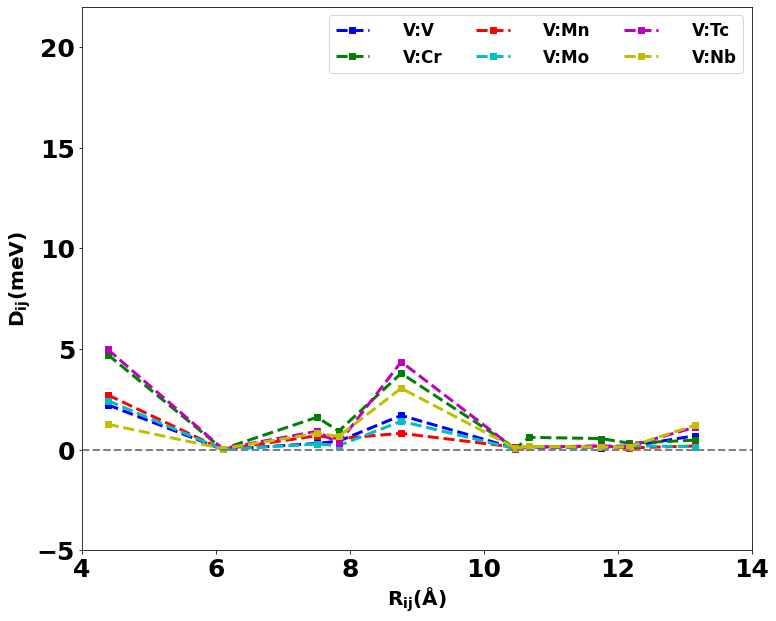

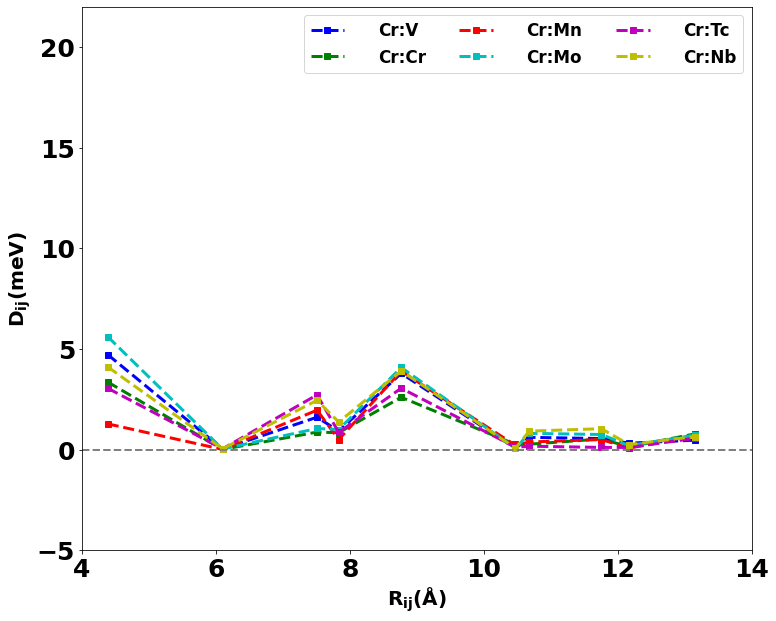

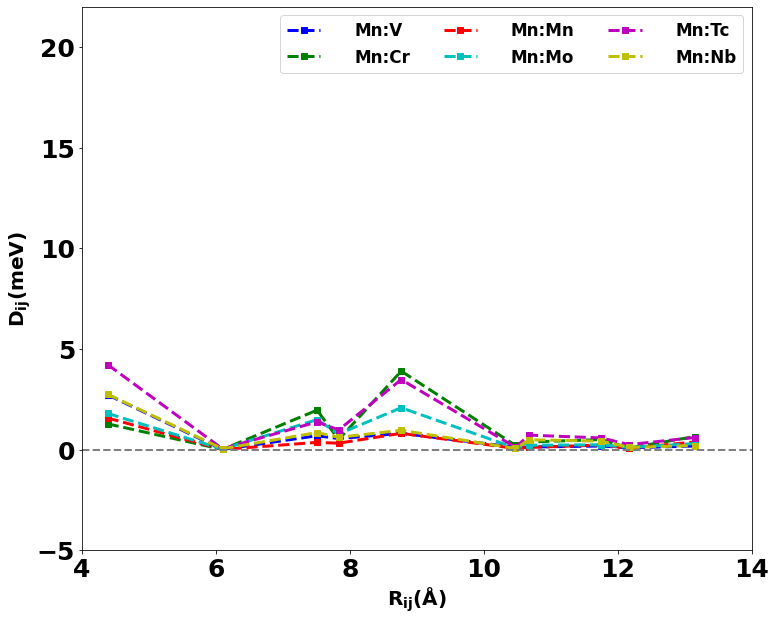

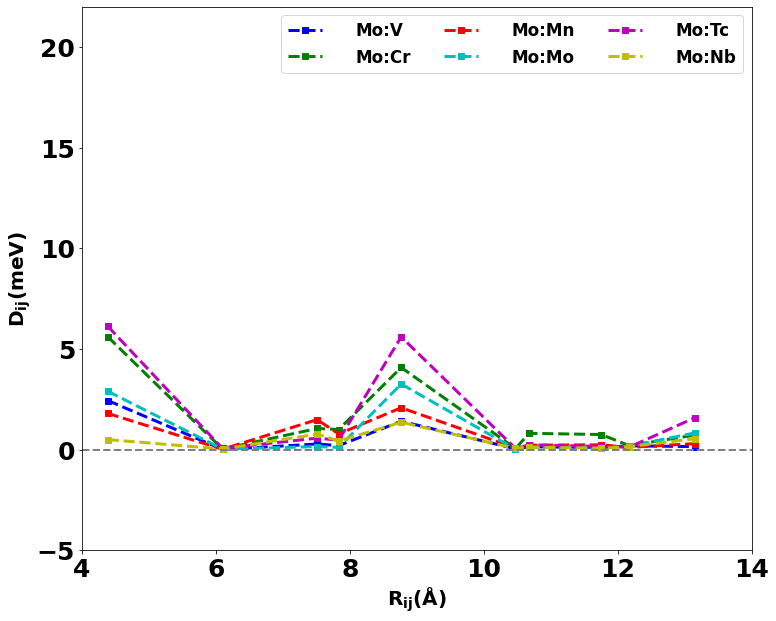

In [21]:
# print(dis_comb_label_map)
# This part is for seperation 
# Bi1 Vs Bi1 and Bi1 Vs Bi2

Bi1_Bi1 = 'il_3:il_3'
Bi1_Bi2 = 'il_3:il_4'

dis_Bi1_Bi1 = []
dis_Bi1_Bi2 = []

for dist_val in dis_comb_label_map.keys():
    
    grp_label = dis_comb_label_map[dist_val]
    
    if Bi1_Bi1 in grp_label:
        dis_Bi1_Bi1.append(float(dist_val))
    if Bi1_Bi2 in grp_label:
        dis_Bi1_Bi2.append(float(dist_val))
dis_Bi1_Bi1.sort()
dis_Bi1_Bi2.sort()

number_of_plot = 4
plt.figure(figsize=(25,18))
row, col = (2, 2)
#print(row, col)

tot_plot_num = len(plot_data)
number_of_plot = tot_plot_num
figure_index = 0

# distanceunit to Angstom
dis_unit = 10.472657559692419 #ang

for fig_cor_row in range(row):
    for fig_cor_col in range(col):
        figure_index += 1
        if (figure_index > number_of_plot) or (figure_index > tot_plot_num):
            continue
        imp1_data = plot_data[figure_index-1]
        
        sImp1 = imp1_data['imp1']
        sImp2_list = list(imp1_data['imp2'].keys())
        
        if (figure_index > number_of_plot) or (figure_index > tot_plot_num):
                continue
                
        #plt.subplot(row, col, figure_index)
        plt.figure(figsize=(12,10))


        i = 0
        for sImp2 in sImp2_list:
            x = imp1_data['imp2'][sImp2]['dist']
## Change the following line as
#    for Jij key = 'Jij'
#    Dij key = 'Dij'
#    D ratio J key = 'D/J'

            key = 'Dij'

            y = imp1_data['imp2'][sImp2][key] 
            jij_1_1 = np.array([y[x.index(val)] for val in dis_Bi1_Bi1])
            jij_1_2 = np.array([y[x.index(val)] for val in dis_Bi1_Bi2])            
            
            orderd_x = x.copy()
            orderd_x.sort()
            y = [y[x.index(value)] for value in orderd_x ]
            x = np.array(orderd_x)*dis_unit
            
            Bi1_Bi1 = np.array(dis_Bi1_Bi1)*dis_unit
            Bi1_Bi2 = np.array(dis_Bi1_Bi2)*dis_unit
            
            label= sImp1 + ':' + sImp2
            
        ### the fllowing code for ilayers 3Vs3 and 3Vs4 separately ###
            il_sep_plt = True
            if not (key=='Jij' and il_sep_plt):
                il_sep_plt=False # to confirm the sepearate plot for Jij
            # For ploting combine plot irespective of the atomic layers
            if not il_sep_plt:
                plt.plot(x, y, 's', label= label, ls='--', color= colors[i], linewidth=3)
            
    ### the fllowing code for ilayers 3Vs3 and 3Vs4 separately ###
            if il_sep_plt:
                Bi1_Bi1_data_shift = 0
                Bi1_Bi2_data_shift = 10
                plt.plot(Bi1_Bi1, (jij_1_1)+Bi1_Bi1_data_shift, 'v',ms=10, label= '${}_{{Bi1}}-{}_{{Bi1}}$'.format(sImp1, sImp2),
                        alpha = 0.5, ls=':', color=colors[i], linewidth=3)
                plt.plot(Bi1_Bi2, jij_1_2+Bi1_Bi2_data_shift, 'o', ms=10,label= '${}_{{Bi1}}-{}_{{Bi2}}$'.format(sImp1, sImp2),
                         alpha = 0.5, ls='-.', color=colors[i], linewidth=3)
            #plt.title('{} Vs (V, Cr, Mn, Mo)'.format(sImp1))
            plt.xlabel('$\mathrm{R_{ij} (\AA)}$', fontsize=20)
            if key=='Jij':
                if not il_sep_plt:
                    title_extend = '_Jij_combine.png'
                    axhline_label2 = key+'=0'
                else:
                    title_extend = '_Jij_3_3_and_3_4.png'
                    axhline_label1 = key+'=0 line for Bi1-Bi1'
                    axhline_label2 = key+'=0 line for Bi1-Bi2'
                plt.ylabel('$\mathrm{J_{ij} (meV)}$', fontsize='x-large')
            if key=='Dij':
                il_sep_plt = False
                axhline_label2 = key+'=0'
                title_extend = '_Dij_combine.png'
                plt.ylabel('$\mathrm{D_{ij} (meV)}$', fontsize='x-large')
            if key=='D/J':
                il_sep_plt = False
                axhline_label2 = key+'=0'
                title_extend = '_Dij_by_Jij_combine.png'
                plt.ylabel('$\mathrm{D_{ij}\;/\;j_{ij}}$', fontsize=20)

            i  = i+1
        
        plt.xticks(size = 25)
        plt.yticks(size = 25)
        
        if key=='D/J':
            plt.ylim(-2, 5) # for D/J
        else:
            plt.ylim(-5, 22) # for Jij and Dij
        plt.xlim(4,14)
        if il_sep_plt:
            plt.axhline(Bi1_Bi1_data_shift, ls= ':', color='grey', label=axhline_label1, linewidth=2)
            plt.axhline(Bi1_Bi2_data_shift, ls= '-.', color='grey', label=axhline_label2, linewidth=2)
            plt.legend(fontsize=13, loc=1,handletextpad=2, ncol=3)
            plt.twinx()
            plt.ylim(-15,12)
            plt.yticks(size = 25)
            
        else:
            plt.axhline(0, ls='--', color='grey', linewidth=2)
            plt.legend(fontsize='large', loc=1,handletextpad=2, ncol=3)
        title= sImp1+title_extend
        print('save_figure as :', title)
        plt.tight_layout
        plt.savefig(title, bbox_inches= 'tight', dpi=300)
        #plt.savefig(title+'.pdf', bbox_inches= 'tight')
        

In [19]:
jij_1_1

array([ 6.28684286,  1.19838064, -0.26680825, -0.05900215, -0.33821628])

In [ ]:
grps = ['762e0df8-6313-460f-b97b-77b68363b878', 'f8dd374e-4c17-4e46-afd9-171c7f3d1205', 
        '9bc27af1-5cc7-4e0e-8ed5-fe6d045eb3e1', 'be8b271f-560b-44e0-ae45-6ca29c94382d', 
        '6b21bb7c-f43d-450f-9aca-56970e1b776c', '2b327305-8c53-4637-b2f9-40cc1bdd03d2', 
        'b1c6d0e9-4a2a-4f2f-808b-dd52bd878699', '96f2ec34-e512-4d47-ac34-d49c36f0c796',
        '982667b6-11ce-4c8c-9e9b-94440356b62f', '79b27008-b219-4445-8f16-fcae171c88ce'] 


In [75]:
#To check the plot data
nodes_149 = list(load_group(149).nodes)
nodes_150 = list(load_group(150).nodes)

#load Jij dada
ex_node = nodes_150[1]

xx = ex_node#.inputs. scf.get_dict()
lab_to_Jij = {}

for node_ in (nodes_149+nodes_150):
     lab_to_Jij[node_.label] = (np.sqrt(np.sum(np.square(node_.outputs.JijData.get_array('JijData')[0][0:3]))),node_.outputs.JijData.get_array('JijData')[0][3])
        
for node_1 in nodes_149:
    for node_2 in nodes_150:
        if 'Cr' in node_1.label:
            search_label = node_1.label.split('Off')[0]
            if search_label in node_2.label:
                print(f"Jij in node {node_1.label} (dist, Jij) = {lab_to_Jij[node_1.label]}",
                      f"and \n Jij in node {node_2.label} (dist, Jij) = {lab_to_Jij[node_2.label]} \n\n") 
                

Jij in node V:Cr:Bi2Te3_il_3_3_Off_4 (dist, Jij) = (1.1620281546864297, 0.15857252304623534) and 
 Jij in node V:Cr:Bi2Te3_il_3_3_Off_5 (dist, Jij) = (1.2555446807174, 0.026921383463452842) 


Jij in node Cr:Cr:Bi2Te3_il_3_3_Off_4 (dist, Jij) = (1.1620281546864297, 0.09824867828068191) and 
 Jij in node Cr:Cr:Bi2Te3_il_3_3_Off_5 (dist, Jij) = (1.2555446807174, 0.3788010150039191) 


Jij in node Cr:Mn:Bi2Te3_il_3_3_Off_4 (dist, Jij) = (1.1620281546864297, 0.001850523112058115) and 
 Jij in node Cr:Mn:Bi2Te3_il_3_3_Off_5 (dist, Jij) = (1.2555446807174, 0.11093828531977468) 


Jij in node Cr:Mo:Bi2Te3_il_3_3_Off_4 (dist, Jij) = (1.1620281546864297, 0.168788706790723) and 
 Jij in node Cr:Mo:Bi2Te3_il_3_3_Off_5 (dist, Jij) = (1.2555446807174, 0.11005820798119396) 


Jij in node Cr:Tc:Bi2Te3_il_3_3_Off_4 (dist, Jij) = (1.1620281546864297, 0.09620074747124664) and 
 Jij in node Cr:Tc:Bi2Te3_il_3_3_Off_5 (dist, Jij) = (1.2555446807174, 0.24824833864814033) 


Jij in node Cr:Nb:Bi2Te3_il_3_3_O